### <span style='color:plum'> Autores: David López y Jimena de Prado </span>

# <span style='color:mediumpurple'> SEMANA 1 </span>

- Importamos las librerías necesarias

In [10]:
import numpy as np, pandas as pd, seaborn as sns
import scipy
from matplotlib import pyplot as plt
pd.set_option.display_maxcolumns = 100
data = pd.read_csv('fuga_clientes_empresa_telefonica_construccion.csv')
data

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in Month 1,Most Loved Competitor network in Month 2,Churn Status
0,ADF0039,1345,44.83,963.0800,0.00,0.00,1.473830e+01,788,2940,1458,4,2G,2G,Weematel,Uxaa,0
1,ADF0040,2713,90.43,5979.4120,48.38,505.00,8.344973e+07,1127,0,58255,2,3G,3G,Uxaa,Uxaa,0
2,ADF0041,746,24.87,114.9000,14.94,13.75,7.115992e+04,15,131,2978,1,3G,3G,PQza,PQza,1
3,ADF0043,1967,65.57,54.1000,8.75,0.00,1.839360e+01,70,696,2274,1,3G,2G,PQza,PQza,1
4,ADF0044,2576,85.87,1222.2204,41.85,131.25,3.537593e+05,98,18635,34804,3,2G,2G,ToCall,Uxaa,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,ADF1996,3836,127.87,24438.8300,664.92,8295.00,1.737079e+06,678,72120,337192,10,3G,3G,ToCall,Weematel,1
1107,ADF1997,105,3.50,75.4000,10.50,10.00,2.401224e+06,22,2532,1522,2,2G,3G,Uxaa,PQza,1
1108,ADF1998,2172,72.40,16.6420,0.00,8.75,1.312746e+05,5,0,203,2,2G,2G,PQza,PQza,1
1109,ADF1999,2774,92.47,652.6300,4.14,57.50,2.166006e+06,526,741,716,1,3G,3G,Weematel,Uxaa,0


## <span style='color:orchid'>  Toma el dataset de fuga de clientes y estandariza las variables. No es necesario que separes los datos en training y test </span>

- Eliminamos las variables innecesarias y codificamos las categóricas

In [11]:
data = data.drop(columns='Customer ID')
data= data.drop(columns='Churn Status')

for s in data.columns:
    print(data[s].dtype)



int64
float64
float64
float64
float64
float64
int64
int64
int64
int64
object
object
object
object


In [12]:
cols_cat=data.loc[:, data.dtypes == object]
cols_num=data.loc[:, data.dtypes != object]


- Estandarizamos las variables

In [13]:
import sklearn 
from sklearn.preprocessing import StandardScaler


In [17]:
data =pd.get_dummies(data, drop_first= True,dtype=int, columns=cols_cat.columns)
xscaler = StandardScaler() ; 
x_train = pd.DataFrame (xscaler.fit_transform(data),columns=data.columns)   #scalado
x_train


C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,...,Most Loved Competitor network in Month 1_PQza,Most Loved Competitor network in Month 1_ToCall,Most Loved Competitor network in Month 1_Uxaa,Most Loved Competitor network in Month 1_Weematel,Most Loved Competitor network in Month 1_Zintel,Most Loved Competitor network in Month 2_PQza,Most Loved Competitor network in Month 2_ToCall,Most Loved Competitor network in Month 2_Uxaa,Most Loved Competitor network in Month 2_Weematel,Most Loved Competitor network in Month 2_Zintel
0,-0.131976,-0.132057,0.097484,-0.523382,-0.207821,-0.319162,1.950148,-0.260918,-0.397885,0.807272,...,-0.570768,-0.413166,-0.533285,3.063197,-0.349603,-0.551353,-0.223818,0.870581,-0.198215,-0.172212
1,0.944255,0.944177,3.907240,0.302504,1.353581,11.053974,3.079969,-0.506733,1.128912,0.005771,...,-0.570768,-0.413166,1.875169,-0.326456,-0.349603,-0.551353,-0.223818,0.870581,-0.198215,-0.172212
2,-0.603220,-0.603146,-0.546684,-0.268344,-0.165308,-0.309466,-0.626112,-0.495780,-0.357025,-0.394979,...,1.752027,-0.413166,-0.533285,-0.326456,-0.349603,1.813719,-0.223818,-1.148658,-0.198215,-0.172212
3,0.357363,0.357441,-0.592859,-0.374012,-0.207821,-0.319161,-0.442807,-0.448540,-0.375950,-0.394979,...,1.752027,-0.413166,-0.533285,-0.326456,-0.349603,1.813719,-0.223818,-1.148658,-0.198215,-0.172212
4,0.836474,0.836553,0.294294,0.191031,0.197989,-0.270951,-0.349489,1.051348,0.498510,0.406522,...,-0.570768,2.420336,-0.533285,-0.326456,-0.349603,-0.551353,-0.223818,0.870581,-0.198215,-0.172212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,1.827740,1.827822,17.926624,10.827340,25.439368,-0.082422,1.583539,5.523254,8.627201,3.211775,...,-0.570768,2.420336,-0.533285,-0.326456,-0.349603,-0.551353,-0.223818,-1.148658,5.045035,-0.172212
1107,-1.107507,-1.107512,-0.576683,-0.344138,-0.176902,0.008092,-0.602782,-0.295031,-0.396165,0.005771,...,-0.570768,-0.413166,1.875169,-0.326456,-0.349603,1.813719,-0.223818,-1.148658,-0.198215,-0.172212
1108,0.518640,0.518640,-0.621308,-0.523382,-0.180767,-0.301273,-0.659440,-0.506733,-0.431622,0.005771,...,1.752027,-0.413166,-0.533285,-0.326456,-0.349603,1.813719,-0.223818,-1.148658,-0.198215,-0.172212
1109,0.992245,0.992324,-0.138294,-0.452709,-0.030038,-0.023965,1.076952,-0.444778,-0.417832,-0.394979,...,-0.570768,-0.413166,-0.533285,3.063197,-0.349603,-0.551353,-0.223818,0.870581,-0.198215,-0.172212


In [ ]:
#x_train=pd.concat([cols_num,cols_cat],axis=1)





## <span style='color:orchid'> Haz PCA:X_pca contendrá tantas columnas como variables originales. La columna i será la correspondiente a la componente principal i+1. Estas componentes están ordenadas por importancia (de más a menos).Importante: en X no deberá estar contenida la variable a predecir </span>

Al hacer PCA se ordenan de mayor a menor las columnas más influyentes (y con mayor varianza) siguiendo con las que no tienen un papel tan significativo en los datos(menor varianza).
Para comprobar esto, podemos graficar las varianzas explicadas contenidas en pca. Como al crear una instancia de PCA no le hemos introducido el parámetro n_components,
no nos quitamos ninguna componente por muy pequeña que sea su varianza explicativa.

A su vez, si usamos la matriz de correlación anterior y cogemos los valores de la diagonal, tenemos las varianzas de las variables originales estandarizadas, que efectivamente son todo unos, con ello podemos trazas la recta roja discontinua.

C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\juanj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

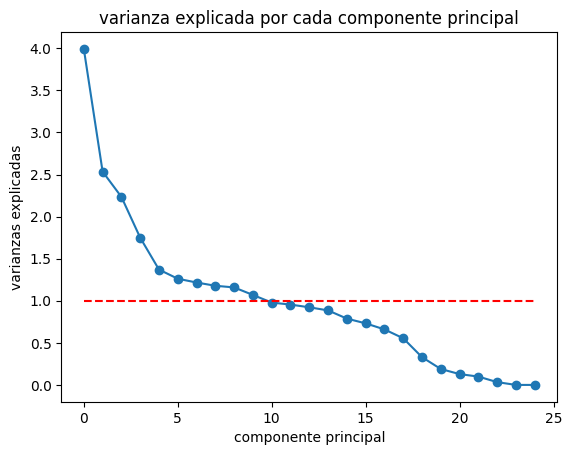

In [25]:
from sklearn.decomposition import PCA ; from matplotlib import pyplot as plt
pca = PCA() # núm. componentes principales = núm. variables
pca.fit(x_train)
X_pca = pca.transform(x_train) #ordenados los array de mayor a menor importancia
df=pd.DataFrame(X_pca)
cor=df.corr() #matriz de covarianzas y varianzas en la diagonal de vars estandarianzas
#print(cor)
varianzas = cor.values.diagonal()

 
num_c_principal=[] ; l_var_expl=[] ; varianzas_componentes=[]
varianzas_componentes = pca.explained_variance_

    
for i, varianza_expl in enumerate(varianzas_componentes):
    num_c_principal.append(i)
    l_var_expl.append(varianza_expl)
    #print(f"varianza explicada por la componente principal {i+1}: {varianza}")
    
plt.scatter(num_c_principal,l_var_expl)
plt.plot(num_c_principal,l_var_expl)

plt.title('varianza explicada por cada componente principal')
plt.xlabel('componente principal')
plt.ylabel('varianzas explicadas')
plt.plot(num_c_principal,varianzas,'r--')



Text(0, 0.5, 'varianzas explicadas')

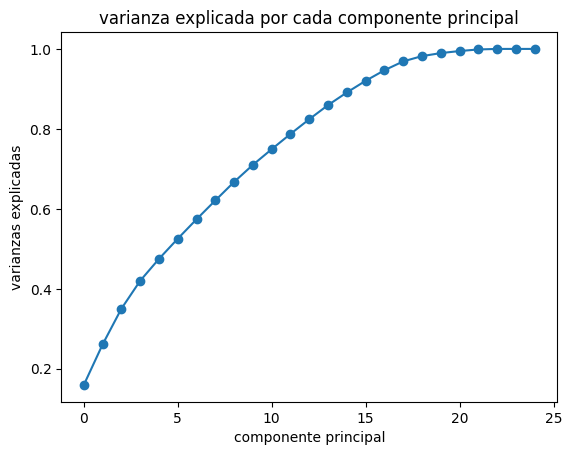

In [30]:
num_c_principal=[] ; l_var_expl=[] ; varianzas_componentes=[]
varianzas_componentes = pca.explained_variance_ratio_


for i, _ in enumerate(varianzas_componentes): 
    num_c_principal.append(i)
    l_var_expl.append(sum(varianzas_componentes[0:(i+1)]))
    
    
plt.scatter(num_c_principal,l_var_expl)
plt.plot(num_c_principal,l_var_expl)

plt.title('varianza explicada por cada componente principal')
plt.xlabel('componente principal')
plt.ylabel('varianzas explicadas')





In [ ]:
varianzas_componentes = pca.explained_variance_ratio_

for i, varianza in enumerate(varianzas_componentes):
    num_c_principal.append(i)
    varianzas.append(varianza)
    print(f"% de varianza explicada por la componente principal {i+1}: {varianza}")
plt.plot(num_c_principal,varianzas)

In [30]:
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-2.341832e+06,-14982.740633,-1321.125141,-31.659851,630.413558,-598.388320,-224.259153,-6.091780,1.858457,0.707891,...,0.348232,0.788535,0.158899,0.006666,-0.034834,0.005641,-0.011827,-0.013899,0.004366,1.353751e-16
1,8.110789e+07,37654.331027,-3231.159432,2495.016485,1909.583609,-718.033300,154.886993,15.351438,-1.341707,1.632174,...,-0.079263,0.046936,0.009195,0.076980,-0.086130,-0.038738,0.078132,-0.037629,0.003690,3.286680e-16
2,-2.270687e+06,-13887.005896,-4315.523670,-807.669346,-98.511499,95.138630,-7.035372,-6.880759,-0.757782,-0.717655,...,-0.098899,-0.030129,0.126266,-0.024873,-0.024637,-0.003317,-0.007860,-0.005030,-0.003111,-1.908263e-16
3,-2.341828e+06,-14503.367853,-3672.410341,391.780531,-355.471654,97.107734,-31.319887,-6.309297,-0.885027,-0.067768,...,-0.011147,-0.092286,0.085883,-0.734656,-0.000758,-0.024261,-0.011877,0.002298,-0.002542,-1.075596e-16
4,-1.988087e+06,20161.133893,9735.992262,953.046810,-426.430123,217.505176,87.047170,-11.528771,0.825494,0.563885,...,-0.320641,-0.233991,0.231551,0.008673,0.059575,-0.003835,0.007208,-0.013078,-0.003351,-2.002359e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,-6.047565e+05,327474.632919,22215.677480,4118.518078,15526.851881,3614.804651,-1332.523755,-8.060354,3.409427,1.189436,...,-0.219488,-0.192464,-0.100008,0.043908,0.164489,-0.120938,-0.056922,-0.027998,-0.001717,1.770862e-16
1107,5.937716e+04,-15100.537603,-1497.023684,-1416.987129,-104.796133,61.661284,-27.568684,-11.931145,0.240041,-0.120852,...,-0.022113,-0.072418,0.315838,0.711190,-0.076652,-0.009528,-0.008266,-0.006372,-0.000003,-1.526699e-16
1108,-2.210572e+06,-16654.763699,-4068.453041,600.578567,-369.723039,157.698824,-5.083790,-15.762577,0.091431,0.540012,...,-0.002907,-0.119861,0.101108,-0.029412,-0.020516,-0.029038,-0.003506,-0.002565,0.000493,3.462703e-18
1109,-1.758406e+05,-16107.822291,-3184.244346,1339.059010,98.476240,-267.342981,-185.833170,-0.316414,-1.114931,-0.607880,...,0.280612,0.859244,0.219940,-0.022098,-0.034142,0.037986,-0.016796,-0.016317,-0.002816,-1.728056e-17


## <span style='color:orchid'> Comprueba que las correlaciones entre diferentes componentes principales es exactamente 0 </span>

## <span style='color:orchid'> Crea una gráfica con la varianza explicada por cada componente principal. La varianza explicada del componente principal i+1 es la varianza de la columna i de X_pca, </span>

## <span style='color:orchid'> Calcula el % de varianza explicada en función del número de componentes principales total y represéntalo en una gráfica.Para calcular el % de varianza explicada para 3 componentes principales, por ejemplo, suma la varianza en esas 3 coordenadas y divídelo entre la varianza total en el dataset (esto debe ser igual al número de variables originales, ya que has tenido que estandarizar las variables), y multiplícalo por 100. </span>

# <span style='color:mediumpurple'> SEMANA 2 </span>
